## Initial Brief

As a  data scientist, I have been tasked with analyzing a mock census dataset to inform two key recommendations for a small town. We're to decide Optimal land development for residents, which infrastructure or services should receive higher budget allocations to meet emerging population demands. By evaluating trends and patterns within the dataset. 

This work covers data cleaning, insights exploration and overall final recommendations.


### Contents
- Importing Libraries
- Data Cleaning;
    - Converting Age from Float to Int.
    - Handling Missing Values
        - Marital Status
        - Religion
    - Validating Column Data Types
    - Outliers and Incorrect Data
    - Checking for Duplicates
    - Validating Integrity Constraints
    - Addressing Empty Cells
- Insights Exploration
    - Demographic Overview
        - Age Distribution Pyramid
        - Gender Distribution
        - Marital Status Distribution
    - Occupation & Economic Insights
        - Occupation Distribution
        - Economic Status by Occupation
        - Income Category
        - Occupation Sector by Age Group
        - Occupation Sector by Marital Status Excluding 'Others'
        - Occupation Sector by Gender
    - Religious Distribution
        - Religious Affiliation Distribution
        - Religion by Age
        - Religion by Gender
        - Religion by Marital Status
        - Religion by Occupation
        - Religion and HouseHold Structure
    - Family Structure
        - Family Structure Distribution
        - Family Structure by Age
        - Family Structure by Gender
        - Family Size

    - Infirmity and Special Needs
        - Infirmity Distribution
        - Infirmity by Age
        - Infirmity by Gender
        - Infirmity by Marital Status
- Recommendation & Conclusion

### Importing Libraries

In [75]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Reading in the original census dataset
df = pd.read_csv('census18.csv') 

In [77]:
# Obtaining data summary
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   9426 non-null   int64  
 1   Street                         9426 non-null   object 
 2   First Name                     9426 non-null   object 
 3   Surname                        9426 non-null   object 
 4   Age                            9426 non-null   float64
 5   Relationship to Head of House  9426 non-null   object 
 6   Marital Status                 6996 non-null   object 
 7   Gender                         9426 non-null   object 
 8   Occupation                     9426 non-null   object 
 9   Infirmity                      9426 non-null   object 
 10  Religion                       6937 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 810.2+ KB


In [78]:
# dataframe structure
df.shape

(9426, 11)

In [79]:
# first five rows of dataset
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Bulldog Crescent,Harry,Baldwin,36.0,Head,Married,Male,Education administrator,None,None
1,1,Bulldog Crescent,Heather,Baldwin,30.0,Wife,Married,Female,Purchasing manager,None,None
2,1,Bulldog Crescent,Katy,Baldwin,0.0,Daughter,NaN,Female,Child,None,NaN
3,1,Bulldog Crescent,Philip,Giles,40.0,Lodger,Divorced,Male,Manufacturing engineer,None,None
4,1,Bulldog Crescent,Shannon,Allen,31.0,Lodger,Single,Female,Restaurant manager,None,Catholic


### Data Cleaning

#### Converting Age from Float to Int. 

In [80]:
# Rounding the 'Age' column to the nearest integer
df['Age'] = df['Age'].round()

# Converting the 'Age' column to integer
df['Age'] = df['Age'].astype(int)

In [81]:
# filter out columns with possible null values
df.columns[df.isnull().any()] 

Index(['Marital Status', 'Religion'], dtype='object')

#### Handling Missing Values

In [82]:
df.isnull().mean() * 100

House Number                      0.000000
Street                            0.000000
First Name                        0.000000
Surname                           0.000000
Age                               0.000000
Relationship to Head of House     0.000000
Marital Status                   25.779758
Gender                            0.000000
Occupation                        0.000000
Infirmity                         0.000000
Religion                         26.405686
dtype: float64

We have two columns with missing values:
- Marital Status 25.78%
- Religion 26.41%


Resolving these columns

##### Marital Status

As at 2021 in the United Kingdom, a minimum age of 16 along with Parental consent is required for a couple to be married. We can therefore deduce that anyone under 16 is underaged. [More Details](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationestimatesbymaritalstatusandlivingarrangements/2020).

In [83]:
marital_status_by_age = df[df['Marital Status'].isna()].sort_values(by='Age')

In [84]:
marital_status_by_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,NaN,Female,Child,None,NaN
1020,121,Love Avenue,June,Williams,0,Daughter,NaN,Female,Child,None,NaN
1021,121,Love Avenue,Antony,Williams,0,Son,NaN,Male,Child,None,NaN
6349,15,Inner Turnpike,Victoria,Cunningham,0,Daughter,NaN,Female,Child,None,NaN
2882,103,Williams Locks,Bethany,Perkins-Shah,0,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5720,11,Dovenip Street,Phillip,Scott,17,Son,NaN,Male,Student,None,NaN
3888,9,Albertpond Crescent,Daniel,Weston,17,Son,NaN,Male,Student,None,NaN
265,12,Love Avenue,Rebecca,Murphy,17,Daughter,NaN,Female,Student,None,NaN
3808,7,Coates Crest,Karl,Bailey,17,Grandson,NaN,Male,Student,None,NaN


Checking count distribution for the entries in the Age column with Marital Status as 'NaN'

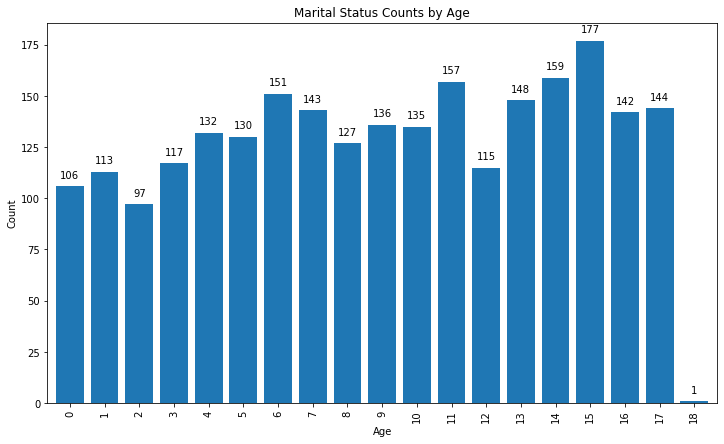

<Figure size 432x288 with 0 Axes>

In [85]:
# Increasing the size of the plot
plt.figure(figsize=(12, 7))

# Creating the bar plot
ax = marital_status_by_age['Age'].value_counts().sort_index().plot(kind='bar', width=0.8)

# Adding count labels on each bar
for i, v in enumerate(marital_status_by_age['Age'].round().value_counts().sort_index()):
    ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Marital Status Counts by Age')
plt.show();

# Saving the plot
plt.savefig('marital_status_counts_by_age_plot.png')

Sorting Age entries below 16 and labelling them as 'Never Married or Civil Partnered'.
The choice of label is as provided by the Office for National Statistics, where persons younger than 16 were noted as Never Married or Never been in a civil partnership. Kindly find more details [here](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationestimatesbymaritalstatusandlivingarrangements/2020).

In [86]:
df.loc[df['Age'] < 16, 'Marital Status'] = 'Never Married or Civil Partnered'

In [87]:
df[df['Age'] < 16]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,Never Married or Civil Partnered,Female,Child,None,NaN
9,3,Bulldog Crescent,Pauline,Roberts,11,Daughter,Never Married or Civil Partnered,Female,Student,None,NaN
12,4,Bulldog Crescent,Maureen,Yates,13,Daughter,Never Married or Civil Partnered,Female,Student,None,NaN
25,10,Bulldog Crescent,Denis,Khan,10,Son,Never Married or Civil Partnered,Male,Student,None,NaN
26,10,Bulldog Crescent,Arthur,Khan,10,Son,Never Married or Civil Partnered,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9400,1,Stevens Lodge,Hollie,Tucker,9,Granddaughter,Never Married or Civil Partnered,Female,Student,None,NaN
9401,1,Stevens Lodge,Norman,Spencer,6,Grandson,Never Married or Civil Partnered,Male,Student,None,NaN
9406,1,Dolphin Lodge,Pamela,Griffiths,15,Daughter,Never Married or Civil Partnered,Female,Student,None,NaN
9407,1,Dolphin Lodge,Clifford,Griffiths,15,Adopted Son,Never Married or Civil Partnered,Male,Student,None,NaN


In [88]:
df['Marital Status'].isnull().sum()

287

##### Religion

In [89]:
df['Religion'].isna().sum()

2489

In [91]:
religion_by_age = df[df['Religion'].isna()].sort_values(by='Age')

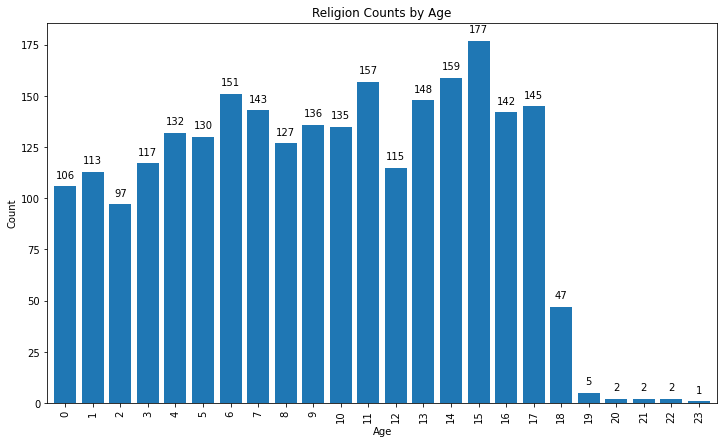

<Figure size 432x288 with 0 Axes>

In [92]:
# Increasing the size of the plot
plt.figure(figsize=(12, 7))

# Creating the bar plot
ax = religion_by_age['Age'].value_counts().sort_index().plot(kind='bar', width=0.8)

# Adding count labels on each bar
for i, v in enumerate(religion_by_age['Age'].round().value_counts().sort_index()):
    ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Religion Counts by Age')
plt.show();

# Saving the plot
plt.savefig('religion_counts_by_age_plot.png')

Research in religion adoption in teens have suggested that they more times than not share in the religion of their parents or guardians, with less than half of a survey sample admitting to kids only accepting some of their parents' religious beliefs, as shared [here](https://www.pewresearch.org/religion/2020/09/10/shared-beliefs-between-parents-and-teens/).

In this case, I will perform a grouping operation that takes down the religion of the head of house as the same for young teens (below 16) for those previously with null values.

In [93]:
# Filtering dataframe to rows with missing religion and age < 16  
fill_rows = df[(df['Religion'].isnull()) & (df['Age'] < 16)]

# Finding the head of the house for each row in fill_rows
head_religion = fill_rows.apply(lambda row: df.loc[(df['House Number'] == row['House Number']) & (df['Relationship to Head of House'] == 'Head'), 'Religion'].iloc[0], axis=1)

# Assigning the found head_religion values to the original DataFrame
df.loc[fill_rows.index, 'Religion'] = head_religion

In [94]:
df['Religion'].isna().sum()

346

In [95]:
df.isnull().mean() * 100

House Number                     0.000000
Street                           0.000000
First Name                       0.000000
Surname                          0.000000
Age                              0.000000
Relationship to Head of House    0.000000
Marital Status                   3.044770
Gender                           0.000000
Occupation                       0.000000
Infirmity                        0.000000
Religion                         3.670698
dtype: float64

In [96]:
# Calculating the mode for 'Marital Status' and 'Religion'
marital_status_mode = df['Marital Status'].mode()[0]
religion_mode = df['Religion'].mode()[0]

In [97]:
religion_mode

'None'

In [98]:
marital_status_mode

'Single'

In [99]:
# Filling NaN values with the mode in the specified columns
df['Marital Status'].fillna(marital_status_mode, inplace=True)
df['Religion'].fillna(religion_mode, inplace=True)

In [100]:
df.isnull().mean() * 100

House Number                     0.0
Street                           0.0
First Name                       0.0
Surname                          0.0
Age                              0.0
Relationship to Head of House    0.0
Marital Status                   0.0
Gender                           0.0
Occupation                       0.0
Infirmity                        0.0
Religion                         0.0
dtype: float64

#### Validating Column Data Types

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9426 non-null   int64 
 1   Street                         9426 non-null   object
 2   First Name                     9426 non-null   object
 3   Surname                        9426 non-null   object
 4   Age                            9426 non-null   int32 
 5   Relationship to Head of House  9426 non-null   object
 6   Marital Status                 9426 non-null   object
 7   Gender                         9426 non-null   object
 8   Occupation                     9426 non-null   object
 9   Infirmity                      9426 non-null   object
 10  Religion                       9426 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 773.4+ KB


House Number is a label, so we should convert it to an object

In [102]:
# Converting 'House Number' to object data type
df['House Number'] = df['House Number'].astype(str)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9426 non-null   object
 1   Street                         9426 non-null   object
 2   First Name                     9426 non-null   object
 3   Surname                        9426 non-null   object
 4   Age                            9426 non-null   int32 
 5   Relationship to Head of House  9426 non-null   object
 6   Marital Status                 9426 non-null   object
 7   Gender                         9426 non-null   object
 8   Occupation                     9426 non-null   object
 9   Infirmity                      9426 non-null   object
 10  Religion                       9426 non-null   object
dtypes: int32(1), object(10)
memory usage: 773.4+ KB


#### Outliers and Incorrect Data

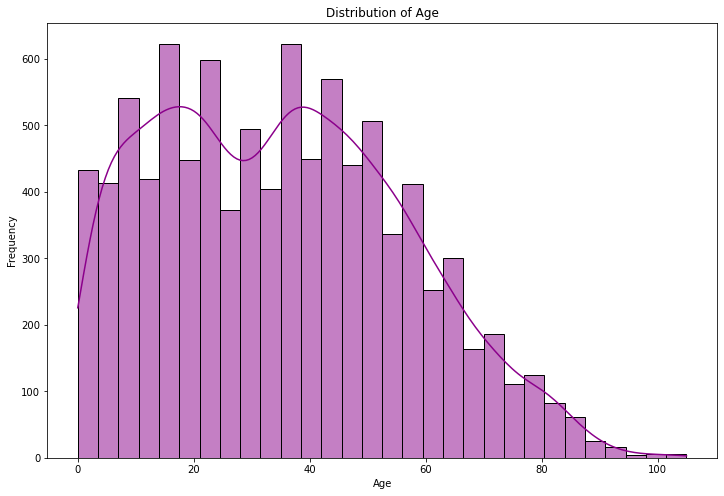

<Figure size 432x288 with 0 Axes>

In [104]:
# Visualizing histogram of Age
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=30, kde=True, color='DarkMagenta')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Saving the plot
plt.savefig('histogram_age_plot.png')

The plot above is left-skewed, suggesting a more youthful than aged distribution. This information will be handy in validating the choices of the council as regards what to invest in. 

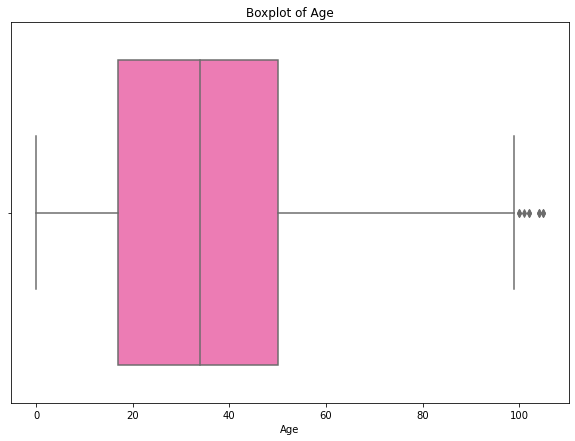

<Figure size 432x288 with 0 Axes>

In [105]:
# Visualizing boxplot of Age to identify outliers
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['Age'], color='HotPink')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Saving the plot
plt.savefig('boxplot_age_plot.png')

Median age stands at about 30 for the distribution. With the High and Low interquartile ranges ranging between 50 and 17

In [106]:
df['Age'].describe()

count    9426.000000
mean       34.971568
std        21.425319
min         0.000000
25%        17.000000
50%        34.000000
75%        50.000000
max       105.000000
Name: Age, dtype: float64

In [107]:
# Filtering rows where Age is less than 0
age_below_zero = df[df['Age'] < 0]
age_below_zero

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [108]:
# Filtering rows where Age is more than 100
age_above_100 = df[df['Age'] > 100]
age_above_100

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
601,60,Love Avenue,Gail,Rogers,101,Head,Married,Female,"Retired Surveyor, rural practice",None,Christian
602,60,Love Avenue,Keith,Rogers,105,Husband,Married,Male,Retired Chief of Staff,None,None
991,118,Love Avenue,Billy,Daniels,104,Head,Single,Male,"Retired Conservator, museum/gallery",None,None
2562,14,Williams Locks,Dawn,Rees,102,Head,Widowed,Female,Retired Financial adviser,None,None
4998,148,Virgofix Crescent,Craig,Begum,105,Head,Married,Male,Retired Applications developer,None,None
6593,127,Portsmouthcoffer Street,Mohammed,Baker,104,Head,Divorced,Male,"Retired Therapist, horticultural",None,Methodist
6986,8,Porter Parks,Gavin,Wallace,102,Head,Single,Male,Retired Health promotion specialist,None,Catholic


I'm satisfied with the value distribution of the Age column.

In [109]:
# Checking for unique values in the 'Gender' column
unique_genders = df['Gender'].unique()
print('Unique values in Gender column:', unique_genders)

Unique values in Gender column: ['Male' 'Female']


#### Checking for Duplicates

In [110]:
# Identifying duplicate rows 
duplicate_rows = df[df.duplicated()]

# Displaying the duplicate rows
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Validating Integrity Constraints

In [111]:
# Checking if there are infants listed as household heads
invalid_household_heads = df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 5)]

# Display rows with infants listed as household heads
print("Rows with infants listed as household heads:")
invalid_household_heads

Rows with infants listed as household heads:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Addressing Empty Cells

In [112]:
# Checking for empty cells along columns
empty_cells_columns = df.eq(' ').any()
print(empty_cells_columns)

House Number                     False
Street                           False
First Name                        True
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                        True
Infirmity                         True
Religion                          True
dtype: bool


Let's create a table having the empty cells all toghether

In [113]:
# Selecting columns with potential empty cells
columns_with_empty_cells = ['First Name', 'Marital Status', 'Occupation', 'Infirmity', 'Religion']

# Creating a boolean mask for empty cells
empty_cells_mask = df[columns_with_empty_cells].applymap(lambda x: x == ' ')

# Using the mask to filter rows with empty cells
rows_with_empty_cells = df[empty_cells_mask.any(axis=1)]

# Rows with empty cells
print("Rows with empty cells:")
rows_with_empty_cells

Rows with empty cells:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1048,126,Love Avenue,Jake,Hughes,56,Lodger,Single,Male,Unemployed,,Christian
1061,128,Love Avenue,Melanie,Poole,32,Lodger,Single,Female,Horticultural therapist,,Methodist
1537,199,Love Avenue,Toby,John,24,Son,Single,Male,"Administrator, arts",,None
2395,7,Merlin Extension,Cheryl,Smith,40,Head,Divorced,Female,Industrial/product designer,,None
3683,22,Morar Lane,Gail,Long,30,Head,Single,Female,Armed forces training and education officer,,Muslim
4954,134,Virgofix Crescent,Derek,Poole,0,Son,Never Married or Civil Partnered,Male,Child,,Christian
6815,14,Kelly Street,,Stephens,51,Wife,Married,Female,"Engineer, manufacturing systems",None,Catholic
8078,7,Green Glens,Jill,Stevens,9,Daughter,Never Married or Civil Partnered,Female,,None,Methodist
8220,29,Green Glens,Jeremy,Green-Morgan,20,Son,Single,Male,University Student,,Christian
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,


Filling empty cells in the Infirmity Column with the mode of the column

In [114]:
# Replacing ' ' with NaN in the 'Infirmity' column
df['Infirmity'].replace(' ', np.nan, inplace=True)

# Fill NaN values in the 'Infirmity' column with the mode
df['Infirmity'].fillna(df['Infirmity'].mode().iloc[0], inplace=True)

In [115]:
# Selecting columns with potential empty cells
columns_with_empty_cells = ['First Name', 'Marital Status', 'Occupation', 'Infirmity', 'Religion']

# Creating a boolean mask for empty cells
empty_cells_mask = df[columns_with_empty_cells].applymap(lambda x: x == ' ')

# Using the mask to filter rows with empty cells
rows_with_empty_cells = df[empty_cells_mask.any(axis=1)]

# Rows with empty cells
print("Rows with empty cells:")
rows_with_empty_cells

Rows with empty cells:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6815,14,Kelly Street,,Stephens,51,Wife,Married,Female,"Engineer, manufacturing systems",None,Catholic
8078,7,Green Glens,Jill,Stevens,9,Daughter,Never Married or Civil Partnered,Female,,None,Methodist
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,
8941,4,Parsons Inlet,Jason,Davies,56,Husband,,Male,Geochemist,None,Catholic


Filling Empty Cell in Occupation column

In [116]:
# Since the person is 9 years old, lets filter the DataFrame for people less than 16
young_people_df = df[df['Age'] < 16]

# Group by age and occupation for young people, then get the count
occupation_by_age_young = young_people_df.groupby(['Age', 'Occupation']).size().reset_index(name='Count')

# Display the result
occupation_by_age_young

,Age,Occupation,Count
0,0,Child,106
1,1,Child,113
2,2,Child,97
3,3,Child,117
4,4,Child,131
5,4,Student,1
6,5,Student,130
7,6,Student,151
8,7,Student,143
9,8,Student,127


Thankfully, we can also define the age distinction from Child to Student. In the UK, it is a [legal requirement](https://www.gdst.net/news/what-age-do-children-start-school-in-the-uk/) that young children are enrolled in a school at age 5. We will also be filling the empty cell with 'Student'.

In [117]:
# Classifying individuals below 5 as 'Child'
df.loc[df['Age'] < 5, 'Occupation'] = 'Child'

In [118]:
# Replacing '  ' with NaN in the 'Occupation' column
df['Occupation'].replace(' ', np.nan, inplace=True)

# Filling NaN values in the 'Occupation' column with 'Student'
df['Occupation'].fillna('Student', inplace=True)

In [119]:
# Since the person is 9 years old, lets filter the DataFrame for people less than 16
young_people_df = df[df['Age'] < 16]

# Grouping by age and occupation for young people, then get the count
occupation_by_age_young = young_people_df.groupby(['Age', 'Occupation']).size().reset_index(name='Count')

# Display the result
occupation_by_age_young

,Age,Occupation,Count
0,0,Child,106
1,1,Child,113
2,2,Child,97
3,3,Child,117
4,4,Child,132
5,5,Student,130
6,6,Student,151
7,7,Student,143
8,8,Student,127
9,9,Student,136


Looks good

In [120]:
# Replacing the ' ' with 'NaN'
df['Religion'].replace(' ', np.nan, inplace=True)

# Fill NaN values with the mode of the 'Religion' column
religion_mode = df['Religion'].mode()[0]
df['Religion'].fillna(religion_mode, inplace=True)

Addressing the empty Marital Status row

In [121]:
husband_entry = df.loc[df['Surname'] == 'Davies'] 

if not husband_entry.empty:
    house_number = husband_entry['House Number'].values[0]
    street = husband_entry['Street'].values[0]

    family_members = df[(df['House Number'] == house_number) & (df['Street'] == street)]
    print(family_members)
else:
    print("Husband entry not found.")

   House Number      Street First Name Surname  Age  \
70            4  Smith Lock     Hilary  Davies   40   

   Relationship to Head of House Marital Status  Gender  \
70                          Head        Widowed  Female   

               Occupation Infirmity Religion  
70  Management consultant      None     None  


In this scenario, we have two entries gotten from a couple. However, the marital status for the wife who is the head of the house says 'Widowed', while for her partner it's blank. The logical assumption here would be an error in gathering/entering the records, so both couple will have 'Married' as their updated labels in the cell.

In [122]:
husband_entry = df.loc[df['Surname'] == 'Davies'] 

if not husband_entry.empty:
    house_number = husband_entry['House Number'].values[0]
    street = husband_entry['Street'].values[0]

    # Finding the wife's entry based on the husband's information
    wife_entry = df[
        (df['Relationship to Head of House'] == 'Head') & 
        (df['House Number'] == house_number) & 
        (df['Street'] == street)
    ]

    # Filling marital status for both husband and wife
    df.loc[husband_entry.index, 'Marital Status'] = 'Married'
    df.loc[wife_entry.index, 'Marital Status'] = 'Married'
    
    print("Marital status updated for husband and wife.")
else:
    print("Husband entry not found.")


Marital status updated for husband and wife.


In [123]:
# Selecting columns with potential empty cells
columns_with_empty_cells = ['First Name', 'Marital Status', 'Occupation', 'Infirmity', 'Religion']

# Creating a boolean mask for empty cells
empty_cells_mask = df[columns_with_empty_cells].applymap(lambda x: x == ' ')

# Using the mask to filter rows with empty cells
rows_with_empty_cells = df[empty_cells_mask.any(axis=1)]

# Rows with empty cells
print("Rows with empty cells:")
rows_with_empty_cells

Rows with empty cells:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6815,14,Kelly Street,,Stephens,51,Wife,Married,Female,"Engineer, manufacturing systems",None,Catholic


In [124]:
# Replacing '  ' with NaN in the 'Occupation' column
df['First Name'].replace(' ', np.nan, inplace=True)

# Filling the empty First Name with 'NA' as there's no way to determine this
df['First Name'].fillna('Not Given', inplace=True)

In [125]:
df[df['First Name'] == 'Not Given']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6815,14,Kelly Street,Not Given,Stephens,51,Wife,Married,Female,"Engineer, manufacturing systems",None,Catholic


In [126]:
# Selecting columns with potential empty cells
columns_with_empty_cells = ['First Name', 'Marital Status', 'Occupation', 'Infirmity', 'Religion']

# Creating a boolean mask for empty cells
empty_cells_mask = df[columns_with_empty_cells].applymap(lambda x: x == ' ')

# Using the mask to filter rows with empty cells
rows_with_empty_cells = df[empty_cells_mask.any(axis=1)]

# Rows with empty cells
print("Rows with empty cells:")
rows_with_empty_cells

Rows with empty cells:


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


All done.

In [127]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

Saving Cleaned Dataset

In [128]:
df.to_csv('cleaned_data.csv', index=False)

### Insights Exploration

In [129]:
df = pd.read_csv('cleaned_data.csv')

#### Demographic Overview
- Age Distribution Pyramid
- Gender Distribution
- Marital Status Distribution

##### Age Distribution Pyramid

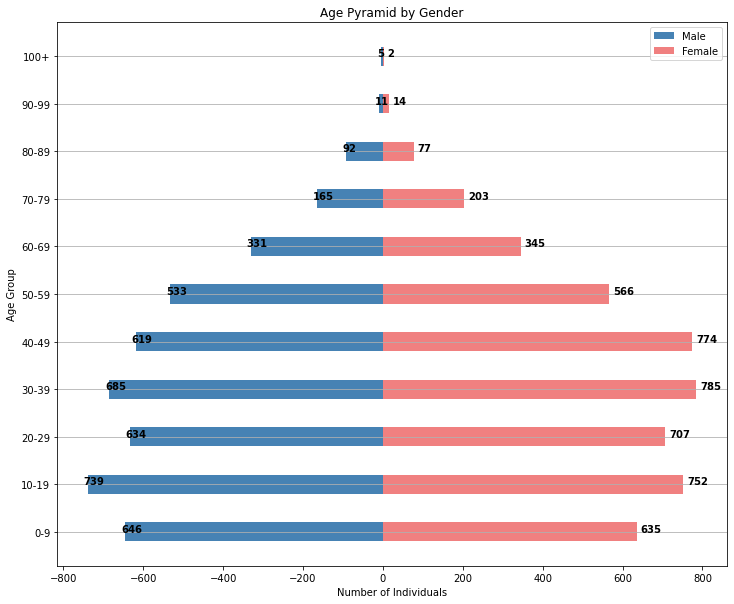

In [130]:
# Defining age brackets for grouping
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# Categorizing individuals into age brackets for males and females
male_age_groups = pd.cut(df[df['Gender'] == 'Male']['Age'], bins=age_bins, labels=age_labels).value_counts().sort_index()
female_age_groups = pd.cut(df[df['Gender'] == 'Female']['Age'], bins=age_bins, labels=age_labels).value_counts().sort_index()

# Creating an age pyramid with clear colors for males and females
fig, ax = plt.subplots(figsize=(12, 10))

# Displaying male age groups as negative values with blue bars
ax.barh(age_labels, -male_age_groups, height=0.4, color='steelblue')

# Displaying female age groups as positive values with pink bars
ax.barh(age_labels, female_age_groups, height=0.4, color='lightcoral')

# Adding labels to the bars showing the respective age group counts
for i, (male, female) in enumerate(zip(male_age_groups, female_age_groups)):
    ax.text(-male - 10, i, str(male), color='black', fontweight='bold')
    ax.text(female + 10, i, str(female), color='black', fontweight='bold')

# Setting the title and labels for the axes
ax.set_title('Age Pyramid by Gender')
ax.set_xlabel('Number of Individuals')
ax.set_ylabel('Age Group')

# Adding a legend to the plot
ax.legend(['Male', 'Female'])

# Displaying grid lines on the x-axis
ax.grid(True, axis='y')

# Saving the age pyramid plot as an image file
plt.savefig('age_pyramid.png')

# Showing the age pyramid plot
plt.show()

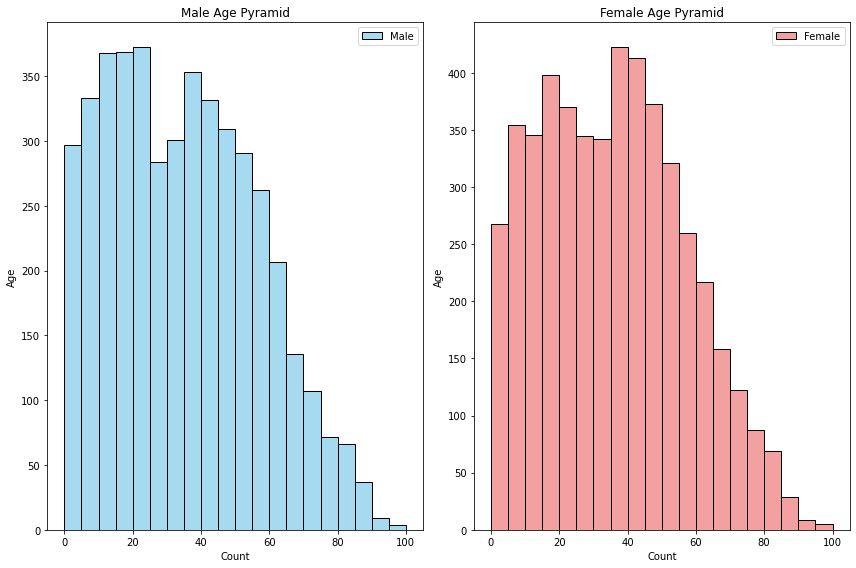

<Figure size 432x288 with 0 Axes>

In [131]:
# Filtering data by gender
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

# Creating age bins for the plot
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Plotting Age Pyramid
plt.figure(figsize=(12, 8))

# Male Age Pyramid
plt.subplot(1, 2, 1)
sns.histplot(male['Age'], bins=age_bins, color='skyblue', label='Male')
plt.title('Male Age Pyramid')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend()

# Female Age Pyramid
plt.subplot(1, 2, 2)
sns.histplot(female['Age'], bins=age_bins, color='lightcoral', label='Female')
plt.title('Female Age Pyramid')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend()

plt.tight_layout()
plt.show()

# Saving the plot
plt.savefig('age_male_female_pyramid.png')

##### Gender Distribution

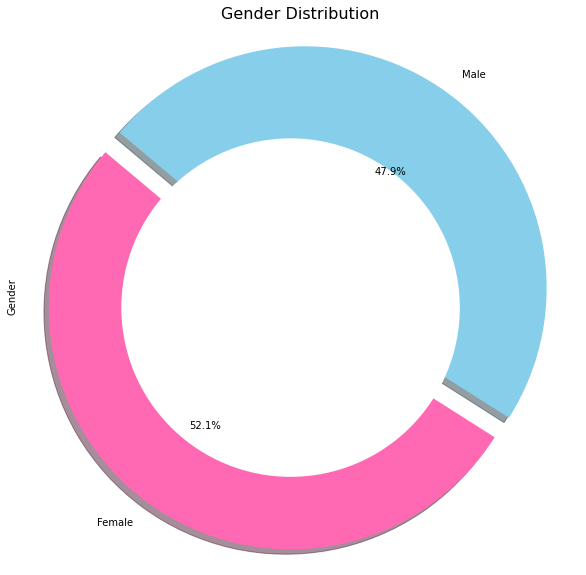

<Figure size 432x288 with 0 Axes>

In [132]:
# Gender Distribution
plt.figure(figsize=(10, 10))

# Colors for the pie chart
colors = ['#FF69B4', '#87CEEB']

# Exploding the 'Female' slice
explode = (0, 0.1)

# pie chart
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)

# Title and center circle to make it a donut chart
plt.title('Gender Distribution', fontsize=16)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

# Saving the plot
plt.savefig('gender_pie_chart.png')

##### Marital Status Distribution

In [133]:
# marital status in percentage
df['Marital Status'].value_counts()/ df['Marital Status'].value_counts().sum() * 100

Single                              38.521112
Married                             26.405686
Never Married or Civil Partnered    22.406111
Divorced                             9.197963
Widowed                              3.469128
Name: Marital Status, dtype: float64

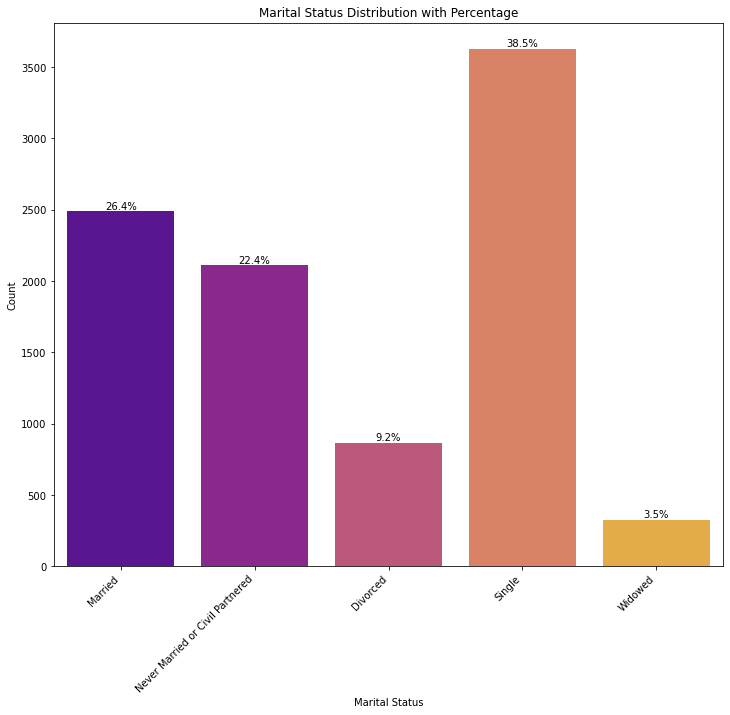

<Figure size 432x288 with 0 Axes>

In [134]:
# Marital Status Distribution with Percentage
plt.figure(figsize=(12, 10))

# Countplot for Marital Status
sns.countplot(x='Marital Status', data=df, palette='plasma')

# Title and axis labels
plt.title('Marital Status Distribution with Percentage')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Adjusting rotation for better readability
plt.xticks(rotation=45, ha='right')

# Adding percentage labels on top of each bar
total_records = len(df)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Displaying the plot
plt.show()

# Saving the plot
plt.savefig('marital_dist.png')

#### Occupation & Economic Insights
- Occupation Distribution
- Economic Status by Occupation
- Income Category
- Occupation Sector by Age Group
- Occupation Sector by Marital Status Excluding 'Others'
- Occupation Sector by Gender

##### Occupation Distribution

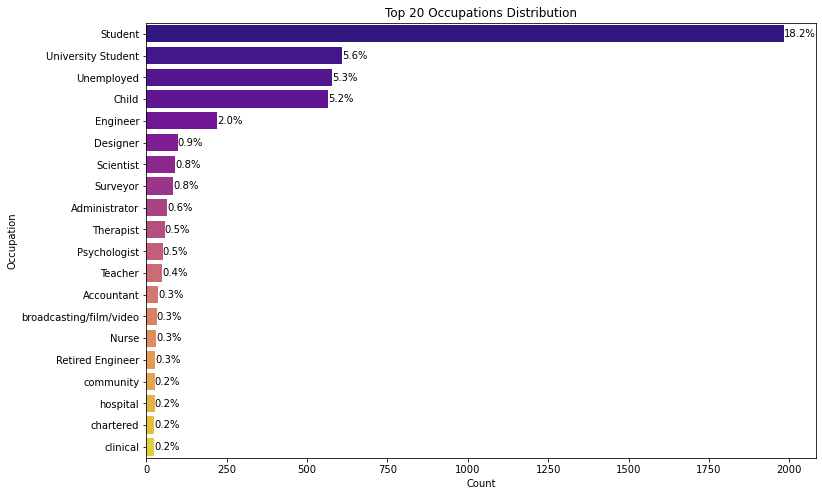

<Figure size 432x288 with 0 Axes>

In [135]:
# Splitting multiple occupations and handling entries with '-'
df['Occupation'] = df['Occupation'].apply(lambda x: x.split(',') if ',' in x else x.split('-'))

# Flattening the list of occupations
occupations = [occupation.strip() for sublist in df['Occupation'] for occupation in sublist]

# Creating a DataFrame with the flattened occupations
occupation_df = pd.DataFrame(occupations, columns=['Occupation'])

# Filtering for the top 20 occupations
top_occupations = occupation_df['Occupation'].value_counts().nlargest(20).index
filtered_df = occupation_df[occupation_df['Occupation'].isin(top_occupations)]

# Plotting the Occupation Distribution with percentage proportion
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=filtered_df, palette='plasma', order=top_occupations)
plt.title('Top 20 Occupations Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')

# Displaying percentage proportion on each bar
total = len(occupation_df['Occupation'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.text(x, y, percentage, ha='left', va='center')

plt.show()

# Saving the plot
plt.savefig('top_20_occupations.png')

Filtering for earning population, so we're excluding Dependants and those retired.

In [136]:
df = pd.read_csv('cleaned_data.csv')

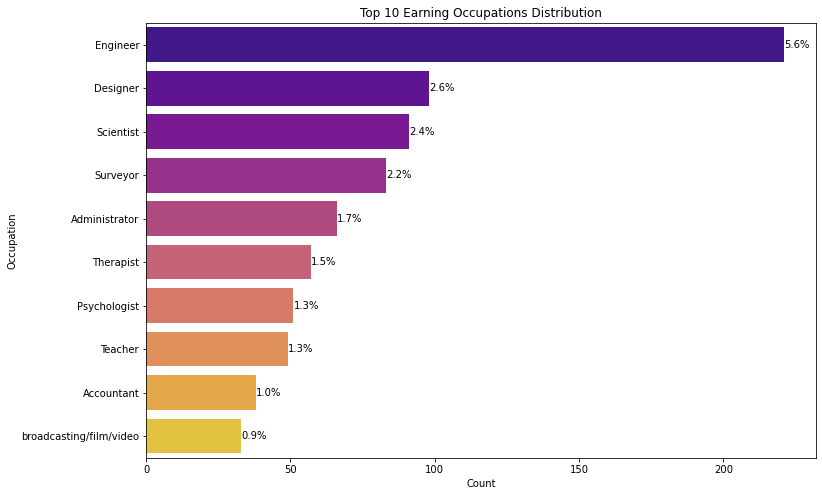

<Figure size 432x288 with 0 Axes>

In [137]:
# Splitting multiple occupations and handling special with '-'
df['Occupation'] = df['Occupation'].apply(lambda x: x.split(',') if ',' in x else x.split('-'))

# Flattening the list of occupations
occupations = [occupation.strip() for sublist in df['Occupation'] for occupation in sublist]

# Creating a DataFrame with the flattened occupations
occupation_df = pd.DataFrame(occupations, columns=['Occupation'])

# Excluding specific occupations
exclude_occupations = ['Student', 'University Student', 'Child', 'Unemployed', 'Retired']
filtered_df = occupation_df[~occupation_df['Occupation'].isin(exclude_occupations)]

# Filtering for the top 20 earning occupations
top_occupations = filtered_df['Occupation'].value_counts().nlargest(10).index

# Plotting the Occupation Distribution with percentage proportion
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=filtered_df, palette='plasma', order=top_occupations)
plt.title('Top 10 Earning Occupations Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')

# Displaying percentage proportion on each bar (excluding excluded occupations)
total_excluded = len(occupation_df['Occupation']) - len(filtered_df['Occupation'])
for p in plt.gca().patches:
    count = int(p.get_width())
    percentage = '{:.1f}%'.format(100 * count / (total_excluded + count))
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.text(x, y, percentage, ha='left', va='center')

plt.show()

# Saving the plot
plt.savefig('top_10_earning_occupations.png')

##### Economic Status by Occupation

In [138]:
df = pd.read_csv('cleaned_data.csv')

In [139]:
# Separate lists for each sector
unemployed_category = ['Unemployed']
retired_category = ['Retired']
child_student_category = ['Child', 'Student', 'University Student']

healthcare_keywords = [
    'Medical', 'Doctor', 'Physician', 'Surgeon', 'Nurse', 'Pharmacist',
    'Health', 'Paramedic', 'Dentist', 'Therapist', 'Radiologist',
    'Pediatrician', 'Gynecologist', 'Cardiologist', 'Psychiatrist'
]

education_keywords = [
    'Teacher', 'Professor', 'Lecturer', 'Student', 'Education',
    'Principal', 'Administrator', 'Librarian', 'Counselor', 'Curriculum',
    'Researcher', 'Tutor', 'Academic', 'Advisor', 'School Psychologist'
]

entertainment_keywords = [
    'Actor', 'Actress', 'Musician', 'Dancer', 'Artist', 'Entertainer',
    'Film Director', 'Cinematographer', 'Makeup Artist', 'Choreographer',
    'Producer', 'Screenwriter', 'Stunt Performer', 'Costume Designer'
]

transportation_keywords = [
    'Driver', 'Pilot', 'Captain', 'Flight Attendant', 'Aircraft Mechanic',
    'Ship Captain', 'Navigator', 'Logistics Specialist', 'Transportation Manager',
    'Freight Dispatcher', 'Courier', 'Truck Driver', 'Railroad Conductor'
]

science_technology_keywords = [
    'Scientist', 'Engineer', 'Technologist', 'Data Scientist', 'IT Specialist',
    'Researcher', 'Biotechnologist', 'Computer Programmer', 'Robotics Engineer',
    'Cybersecurity Analyst', 'Software', 'Developer', 'Network Administrator',
    'Aerospace Engineer', 'Bioinformatician'
]

military_keywords = [
    'Military Officer', 'Soldier', 'Navy', 'Airforce',
    'Marine', 'Special Forces', 'Intelligence Officer', 'Combat',
    'Medic', 'Military Police', 'Logistics Officer', 'Drone Operator',
    'Strategist', 'Military Analyst', 'Commander'
]

finance_keywords = [
    'Accountant', 'Financial', 'Analyst', 'Investment Banker', 'Economist',
    'Actuary', 'Auditor', 'Tax Consultant', 'Financial Planner', 'Risk Analyst',
    'Hedge Fund Manager', 'Venture Capitalist', 'Loan Officer', 'Credit Analyst',
    'Quantitative Analyst', 'Portfolio Manager'
]

business_keywords = [
    'Entrepreneur', 'Business', 'Owner', 'Manager', 'Executive', 'CEO',
    'Business Consultant', 'Operations Manager', 'Human Resources Manager',
    'Marketing Specialist', 'Sales Representative', 'Strategist',
    'Business Analyst', 'Supply Chain Manager', 'Project Manager', 'Investor'
]

agriculture_keywords = [
    'Farmer', 'Agricultural', 'Horticulturist', 'Rancher',
    'Agronomist', 'Agriculture', 'Livestock', 'Crop Consultant',
    'Soil Scientist', 'Irrigation Specialist', 'Sustainable Agriculture Specialist',
    'Agriculture Extension Officer', 'Farm Equipment Technician', 'Poultry Farmer'
]


art_culture_keywords = [
    'Curator', 'Cultural Anthropologist', 'Librarian', 'Historian',
    'Archivist', 'Museum Director', 'Art Conservator', 'Archaeologist',
    'Art Historian', 'Cultural Heritage Specialist', 'Librarian',
    'Tour Guide', 'Gallery Manager', 'Public Historian', 'Music Archivist'
]

communication_keywords = [
    'Journalist', 'Communications', 'Public Relations Manager', 'PR', 
    'Reporter', 'Editor', 'Copywriter', 'Social Media Manager', 'Media Planner',
    'TV Producer', 'Radio Broadcaster', 'News Anchor', 'Content Creator',
    'Speechwriter', 'Publicist', 'Podcaster'
]

Defining a function to group the occupations into sectors

In [140]:
# Function to assign occupation sector
def assign_occupation_sector(occupation):
    if any(keyword in occupation for keyword in retired_category):
        return 'Retired'
    elif any(keyword in occupation for keyword in healthcare_keywords):
        return 'Healthcare'
    elif any(keyword in occupation for keyword in education_keywords):
        return 'Education'
    elif any(keyword in occupation for keyword in entertainment_keywords):
        return 'Entertainment'
    elif any(keyword in occupation for keyword in transportation_keywords):
        return 'Transportation'
    elif any(keyword in occupation for keyword in science_technology_keywords):
        return 'Science and Technology'
    elif any(keyword in occupation for keyword in military_keywords):
        return 'Military'
    elif any(keyword in occupation for keyword in finance_keywords):
        return 'Finance'
    elif any(keyword in occupation for keyword in business_keywords):
        return 'Business'
    elif any(keyword in occupation for keyword in agriculture_keywords):
        return 'Agriculture'
    elif any(keyword in occupation for keyword in art_culture_keywords):
        return 'Art and Culture'
    elif any(keyword in occupation for keyword in communication_keywords):
        return 'Communication'
    elif any(keyword in occupation for keyword in unemployed_category):
        return 'Unemployed'
    elif occupation in child_student_category:
        return 'Dependent'  
    else:
        return 'Other'

# Applying the function to create a new column 'Occupation Sector'
df['Occupation Sector'] = df['Occupation'].apply(assign_occupation_sector)

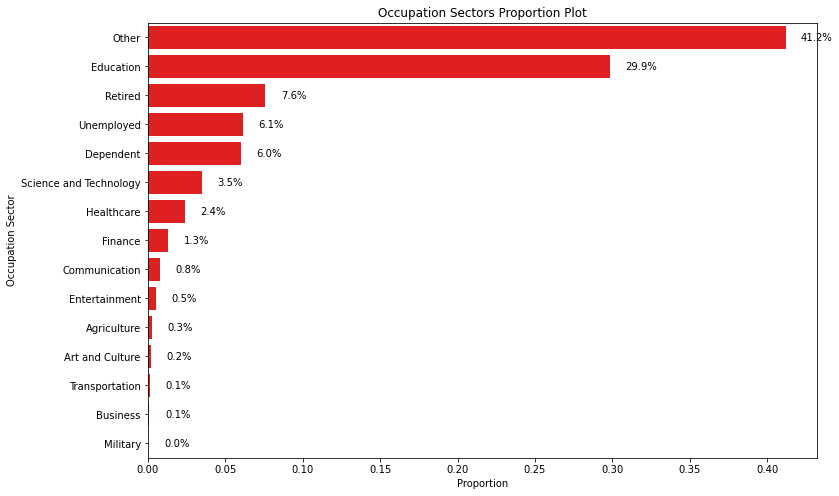

<Figure size 432x288 with 0 Axes>

In [141]:
# Counting the occurrences of each sector
sector_counts = df['Occupation Sector'].value_counts()

# Calculating proportions
sector_proportions = sector_counts / len(df)

# Creating a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sector_proportions, y=sector_proportions.index, color='red')

# Displaying percentage labels on each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width())
    x_pos = p.get_x() + p.get_width() + 0.01
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x_pos, y_pos), ha='left', va='center', fontsize=10)

plt.title('Occupation Sectors Proportion Plot')
plt.xlabel('Proportion')
plt.ylabel('Occupation Sector')
plt.show()

# Saving the plot
plt.savefig('occupation_proportion.png')

The above distribution shows the various sectors represented by the data. Using a treemap and excluding occupations labelled as 'Others' we have the following:

In [142]:
# Filter DataFrame to exclude 'Other' sector
df_filtered = df[df['Occupation Sector'] != 'Other']

# Create treemap plot
fig = px.treemap(df_filtered, path=['Occupation Sector'])

# Update layout
fig.update_layout(
    height=600,
    width=950,
    title_text="Occupation Sectors without 'Others'",
    title_x=0.5
)

fig.data[0].hovertemplate = "Sector: %{label} <br>Count: %{value}"

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the plot
fig.show()

##### Income Category: Sorting by Earning Capacity

In [143]:
# Defining keywords for income categories
high_income_keywords = {
    'Investment', 'Management', 'Consulting', 'Chief', 'Executive', 'Financial', 'Director', 
    'Legal', 'Tax', 'Professor', 'Senior'
}
upper_middle_income_keywords = {
    'Engineer', 'Research', 'Scientist', 'Developer', 'Analyst', 'Architect', 'Designer', 
    'Programmer', 'Specialist'
}
average_income_keywords = {
    'Nurse', 'Teacher', 'Officer', 'Coordinator', 'Assistant', 'Technician', 'Administrator', 
    'Operator', 'Counselor', 'Inspector'
}
low_income_keywords = {
    'Assistant', 'Worker', 'Aid', 'Technician', 'Support', 'Clerk', 'Operator', 'Laboratory', 
    'Sales', 'Service', 'Receptionist', 'Security', 'Waiter', 'Caretaker', 'Driver', 'Guard', 
    'Cleaner'
}

Function to assign income category

In [144]:
# Function to assign income category
def assign_income_category(occupation):
    if any(keyword in occupation for keyword in high_income_keywords):
        return 'High Income'
    elif any(keyword in occupation for keyword in upper_middle_income_keywords):
        return 'Upper Middle Income'
    elif any(keyword in occupation for keyword in average_income_keywords):
        return 'Average Income'
    elif any(keyword in occupation for keyword in low_income_keywords):
        return 'Low Income'
    else:
        return 'Other'

# Applying the function to create a new column 'Income Category'
df['Income Category'] = df['Occupation'].apply(assign_income_category)

In [145]:
df['Income Category'].value_counts()

Other                  8396
Upper Middle Income     582
High Income             224
Average Income          169
Low Income               55
Name: Income Category, dtype: int64

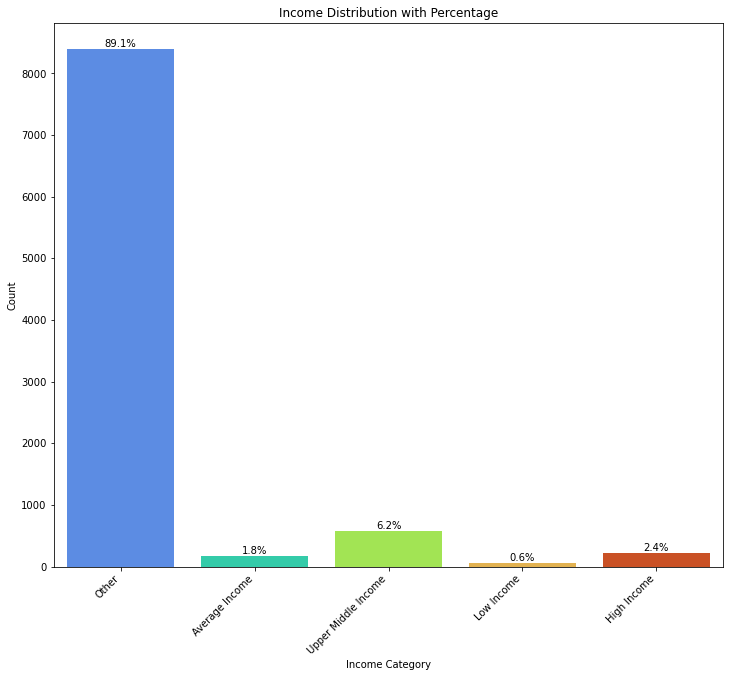

<Figure size 432x288 with 0 Axes>

In [146]:
plt.figure(figsize=(12, 10))

# Countplot for Marital Status
sns.countplot(x='Income Category', data=df, palette='turbo')

# Title and axis labels
plt.title('Income Distribution with Percentage')
plt.xlabel('Income Category')
plt.ylabel('Count')

# Adjusting rotation for better readability
plt.xticks(rotation=45, ha='right')

# Adding percentage labels on top of each bar
total_records = len(df)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Displaying the plot
plt.show()

# Saving the plot
plt.savefig('income_category_1.png')

For a better perspective, let's exclude 'Others'

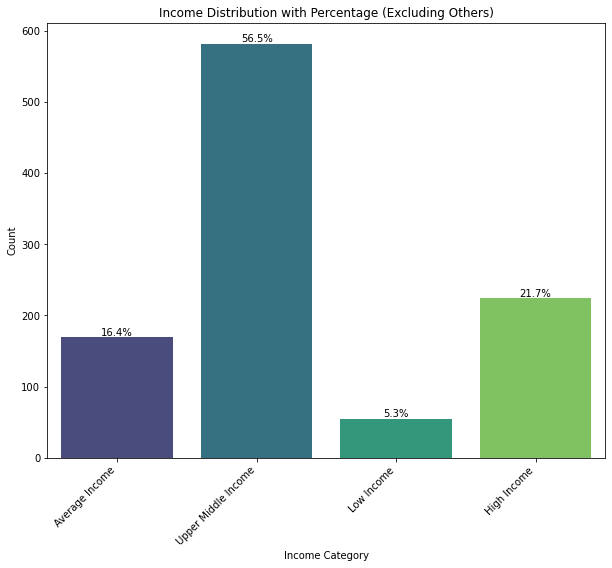

In [147]:
# Filtering out rows with 'Other' in 'Income Category'
df_filtered = df[df['Income Category'] != 'Other']

plt.figure(figsize=(10, 8))

# Countplot for Income Category
sns.countplot(x='Income Category', data=df_filtered, palette='viridis')

# Title and axis labels
plt.title('Income Distribution with Percentage (Excluding Others)')
plt.xlabel('Income Category')
plt.ylabel('Count')

# Adjusting rotation for better readability
plt.xticks(rotation=45, ha='right')

# Adding percentage labels on top of each bar
total_records = len(df_filtered)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Saving the plot
plt.savefig('income_category.png')

# Displaying the plot
plt.show()

##### Occupation Sector by Age Group

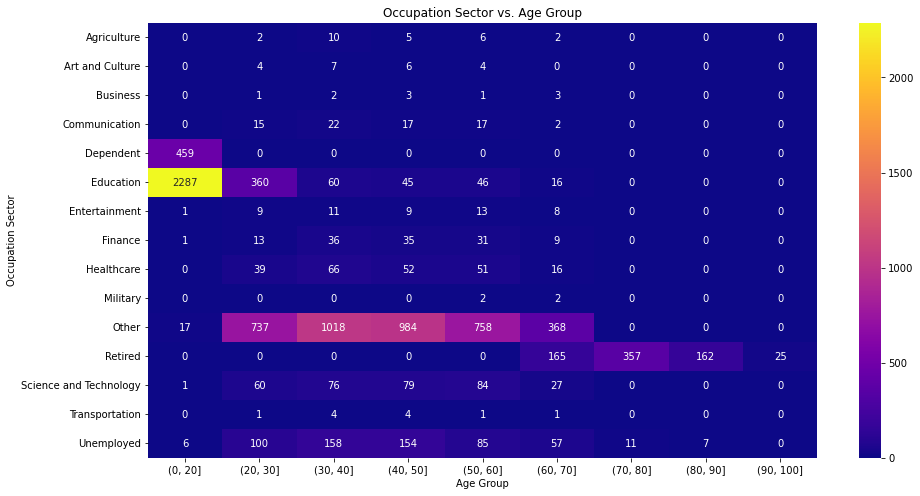

In [280]:
plt.figure(figsize=(15, 8))

# heatmap
sns.heatmap(pd.crosstab(df['Occupation Sector'], pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])),
            cmap='plasma', annot=True, fmt='d')

# Title and labels
plt.title('Occupation Sector vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Occupation Sector')

plt.show()

##### Occupation Sector by Marital Status Excluding 'Others'

In [281]:
# exclude 'Other' sector
df_filtered = df[df['Occupation Sector'] != 'Other']

# Calculating the count for each combination of Occupation Sector and Marital Status
count_df = df_filtered.groupby(['Occupation Sector', 'Marital Status']).size().reset_index(name='Count')

# treemap plot
fig = px.treemap(count_df, path=['Occupation Sector', 'Marital Status'], 
                 values='Count', title='Occupation Sector vs. Marital Status',
                 hover_data={'Count': True}, color='Count',
                 color_continuous_scale='turbo')

# Update layout
fig.update_layout(
    height=600,
    width=950,
    title_text="Occupation Sector vs. Marital Status Excluding Others",
    title_x=0.5,
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_showscale=False
)

# Show the plot
fig.show()

# Saving the plot
plt.savefig('occupation_vs_marital_status.png')

<Figure size 432x288 with 0 Axes>

##### Occupation Sector by Gender

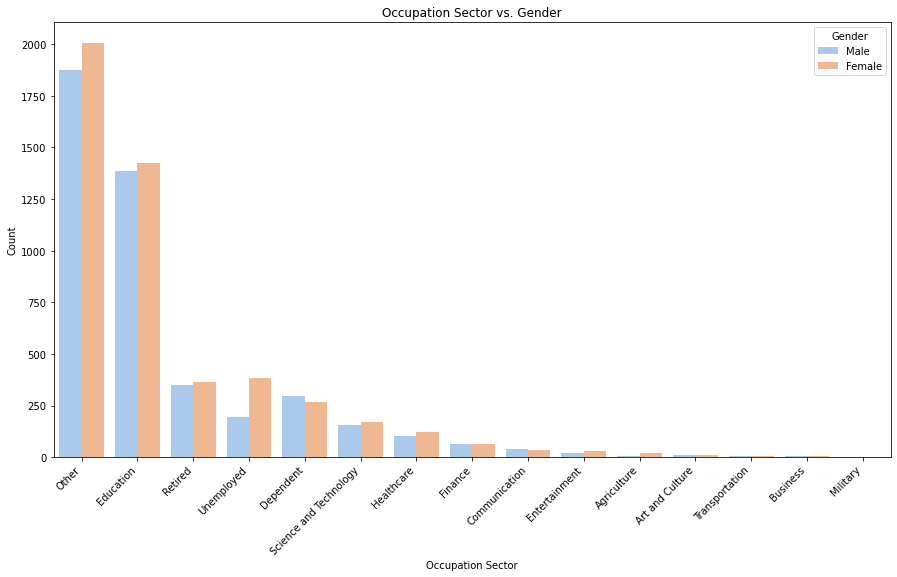

<Figure size 432x288 with 0 Axes>

In [282]:
plt.figure(figsize=(15, 8))

# Create a grouped bar chart
sns.countplot(x='Occupation Sector', hue='Gender', data=df, palette='pastel',
              order=df['Occupation Sector'].value_counts().index)

# Title and labels
plt.title('Occupation Sector vs. Gender')
plt.xlabel('Occupation Sector')
plt.ylabel('Count')

# Adjusting rotation for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Saving the plot
plt.savefig('occupation_gender.png')

Religious Distribution
- Religious Affiliation Distribution
- Religion by Age
- Religion by Gender
- Religion by Marital Status
- Religion by Occupation
- Religion and HouseHold Structure

##### Religious Affiliation Distribution

In [148]:
df['Religion'].value_counts()

None         4265
Christian    2561
Catholic     1433
Methodist     895
Muslim        158
Sikh           62
Jewish         30
Nope            9
Buddist         6
Bahai           2
Private         1
Baptist         1
Sith            1
Agnostic        1
Orthodoxy       1
Name: Religion, dtype: int64

In [149]:
# Replacing 'Nope' with 'None'
df['Religion'] = df['Religion'].replace('Nope', 'None')

# Replacing 'Sith' with 'Sikh'
df['Religion'] = df['Religion'].replace('Sith', 'Sikh')

# Replacing 'Orthodoxy' with 'Christian'
df['Religion'] = df['Religion'].replace('Orthodoxy', 'Christian')

In [150]:
df['Religion'].value_counts()

None         4274
Christian    2562
Catholic     1433
Methodist     895
Muslim        158
Sikh           63
Jewish         30
Buddist         6
Bahai           2
Private         1
Baptist         1
Agnostic        1
Name: Religion, dtype: int64

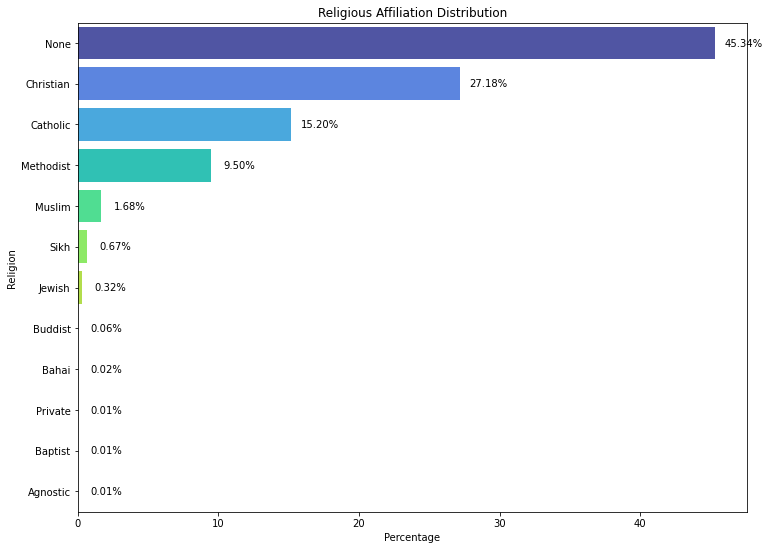

In [151]:
# Calculate percentage proportions for each religion
religion_percentages = df['Religion'].value_counts(normalize=True) * 100

# Plot horizontal bar chart
plt.figure(figsize=(12, 9))
ax = sns.barplot(x=religion_percentages, y=religion_percentages.index, palette='turbo')

# Display percentage labels at the end of each bar with more room
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 2, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='center', va='center')

plt.title('Religious Affiliation Distribution')
plt.xlabel('Percentage')
plt.ylabel('Religion')
plt.show()

##### Religion by Age 

In [154]:
df.groupby('Religion')['Age'].mean()

Religion
Agnostic     46.000000
Bahai        46.000000
Baptist      32.000000
Buddist      35.166667
Catholic     31.669225
Christian    40.695550
Jewish       41.466667
Methodist    31.886034
Muslim       29.075949
None         33.543753
Private      27.000000
Sikh         29.333333
Name: Age, dtype: float64

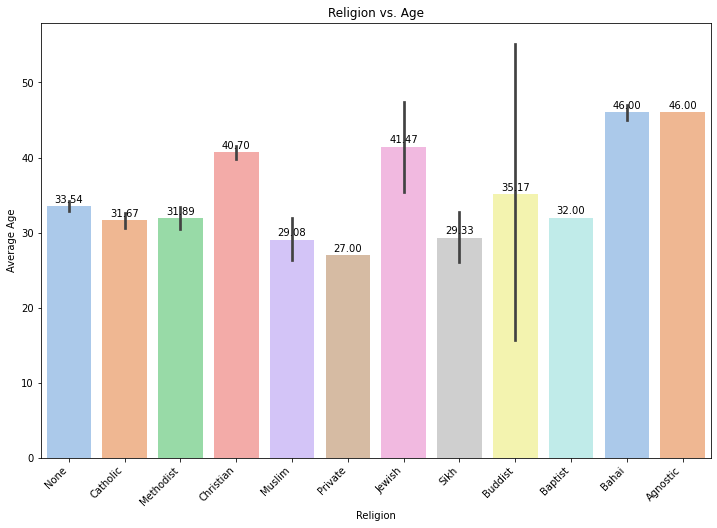

In [152]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Religion', y='Age', data=df, palette='pastel')

# Display average age values on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, f'{height:.2f}', ha='center', va='bottom')

plt.title('Religion vs. Age')
plt.xlabel('Religion')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see the average age of followers of each religion

##### Religion by Gender

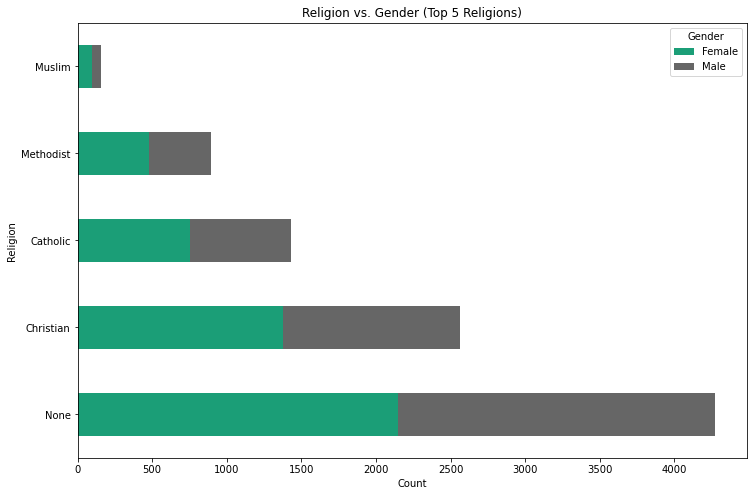

In [155]:
# Getting the top 5 religions
top_religions = df['Religion'].value_counts().nlargest(5).index

df_top_religions = df[df['Religion'].isin(top_religions)]

# horizontal stacked bar plot for the top 5 religions
gender_religion = df_top_religions.groupby(['Religion', 'Gender']).size().unstack()
gender_religion = gender_religion.loc[gender_religion.sum(axis=1).sort_values(ascending=False).index]

gender_religion.plot(kind='barh', stacked=True, colormap='Dark2', figsize=(12, 8))
plt.title('Religion vs. Gender (Top 5 Religions)')
plt.xlabel('Count')
plt.ylabel('Religion')
plt.show()

##### Religion by Marital Status

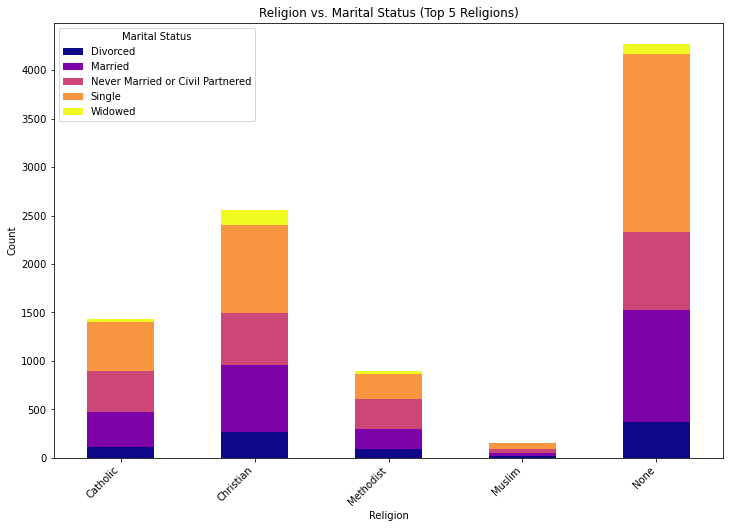

In [156]:
# Getting the top 5 religions
top_religions = df['Religion'].value_counts().nlargest(5).index

df_top_religions = df[df['Religion'].isin(top_religions)]

# stacked bar plot for the top 5 religions
marital_religion = df_top_religions.groupby(['Religion', 'Marital Status']).size().unstack()
ax = marital_religion.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 8))

# title and axis labels
plt.title('Religion vs. Marital Status (Top 5 Religions)')
plt.xlabel('Religion')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

##### Relgion by Occupation

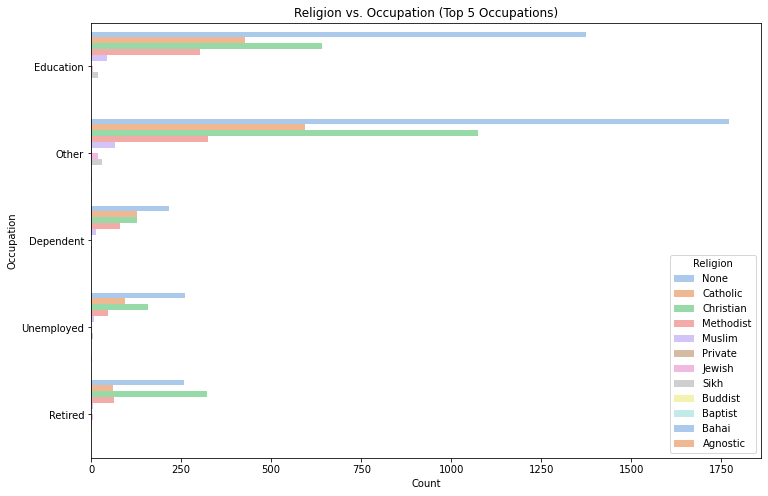

In [157]:
# top 5 occupations
top_occupations = df['Occupation Sector'].value_counts().nlargest(5).index

# top 5 occupations
df_top_occupations = df[df['Occupation Sector'].isin(top_occupations)]

# horizontal bar plot for Religion vs. Occupation for the top 5 occupations
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation Sector', hue='Religion', data=df_top_occupations, palette='pastel')
plt.title('Religion vs. Occupation (Top 5 Occupations)')
plt.ylabel('Occupation')
plt.xlabel('Count')
plt.legend(title='Religion', loc='lower right')
plt.show()

##### Religion and HouseHold Structure

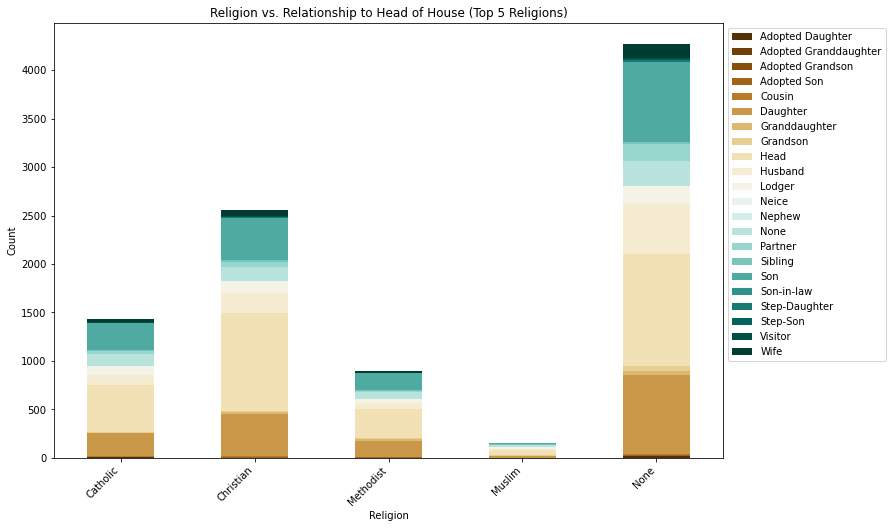

In [158]:
# Getting the top 5 religions
top_religions = df['Religion'].value_counts().nlargest(5).index

df_top_religions = df[df['Religion'].isin(top_religions)]

# stacked bar plot for the top 5 religions
rthoh_religion = df_top_religions.groupby(['Religion', 'Relationship to Head of House']).size().unstack()
ax = rthoh_religion.plot(kind='bar', stacked=True, colormap='BrBG', figsize=(12, 8))

# title and axis labels
plt.title('Religion vs. Relationship to Head of House (Top 5 Religions)')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Family Structure
- Family Structure Distribution
- Family Structure by Age
- Family Structure by Gender

##### Family Structure Distribution

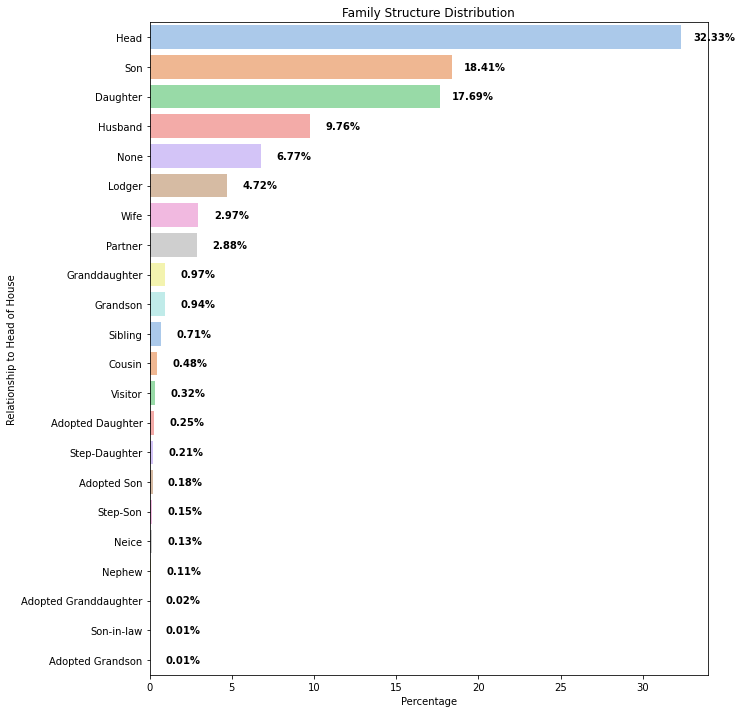

In [159]:
# Calculating percentage proportions for each relationship category
relationship_percentages = df['Relationship to Head of House'].value_counts(normalize=True) * 100

# horizontal bar chart with percentage labels
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=relationship_percentages, y=relationship_percentages.index, palette='pastel')

# Display bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 2, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='center', va='center', fontweight='bold')

plt.title('Family Structure Distribution')
plt.xlabel('Percentage')
plt.ylabel('Relationship to Head of House')
plt.show()

##### Family Structure by Age

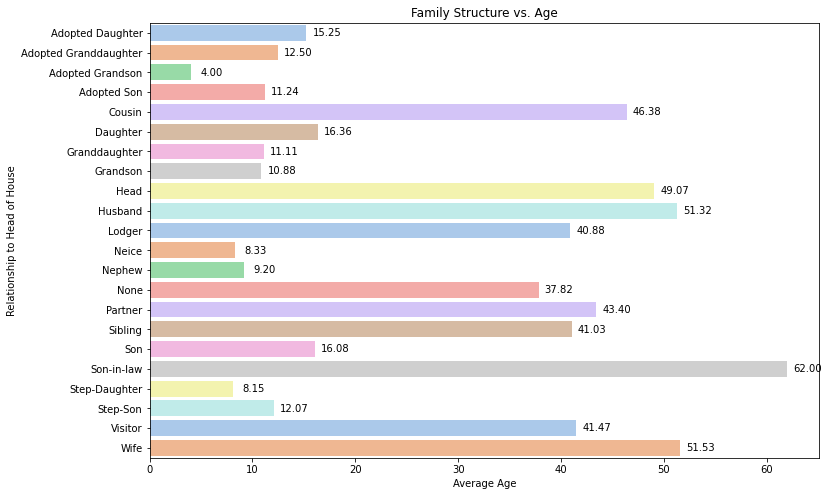

In [160]:
# Calculate average age for each relationship category
relationship_age = df.groupby('Relationship to Head of House')['Age'].mean().reset_index()

# Plot horizontal bar chart with average age and percentage labels
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Age', y='Relationship to Head of House', data=relationship_age, palette='pastel')

# Display average age labels at the end of each bar
for i, (value, name) in enumerate(zip(relationship_age['Age'], relationship_age['Relationship to Head of House'])):
    ax.text(value + 2, i, f'{value:.2f}', ha='center', va='center')

plt.title('Family Structure vs. Age')
plt.xlabel('Average Age')
plt.ylabel('Relationship to Head of House')
plt.show()


##### Family Structure by Gender

<Figure size 864x576 with 0 Axes>

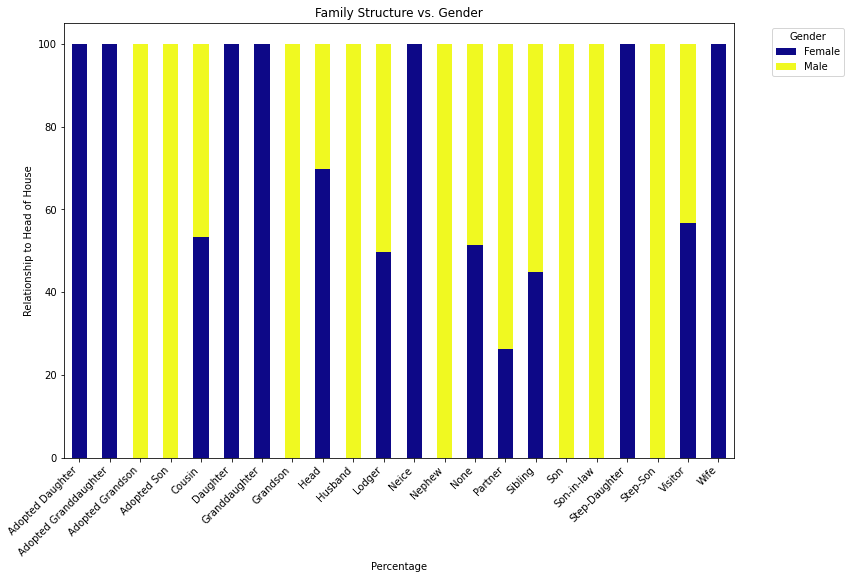

In [344]:
# Calculate percentage proportions for each family structure category and gender
gender_structure_percentage = df.groupby(['Relationship to Head of House', 'Gender']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Plot horizontal bar chart with percentage labels
plt.figure(figsize=(12, 8))
ax = gender_structure_percentage.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 8))

ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# title and axis labels
plt.title('Family Structure vs. Gender')
plt.xlabel('Percentage')
plt.ylabel('Relationship to Head of House')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Family Size

Trying to categorize the size of each family, based on those who stay there at the address.

In [161]:
df['Family Size'] = df.groupby('Street')['First Name'].transform('count')

df['Family Number'] = df.groupby('Street')['House Number'].transform('nunique')

# Mapping family size categories
conditions = [
    (df['Family Size'] > 4),   # Large Family
    (df['Family Size'] > 2) & (df['Family Size'] <= 4),   # Medium Family
    (df['Family Size'] <= 2)   # Small Family
]

choices = ['Large', 'Medium', 'Small']

df['Family Size Category'] = np.select(conditions, choices, default='Unknown')

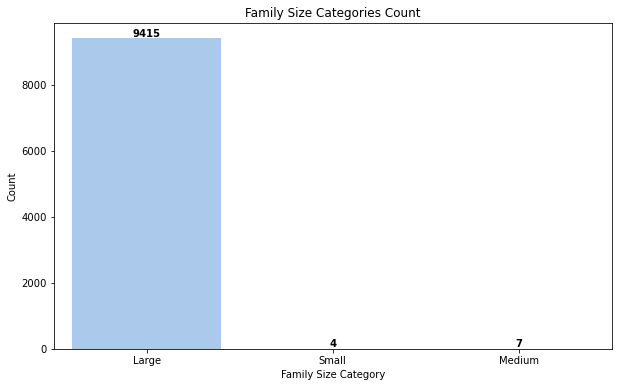

In [162]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Family Size Category', data=df, palette='pastel')

# labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.title('Family Size Categories Count')
plt.xlabel('Family Size Category')
plt.ylabel('Count')
plt.show()

There are much more large settlers or families than small and medium ones per address. 

#### Infirmity and Special Needs 
- Infirmity Distribution
- Infirmity by Age
- Infirmity by Gender
- Infirmity by Marital Status

##### Infirmity Distribution

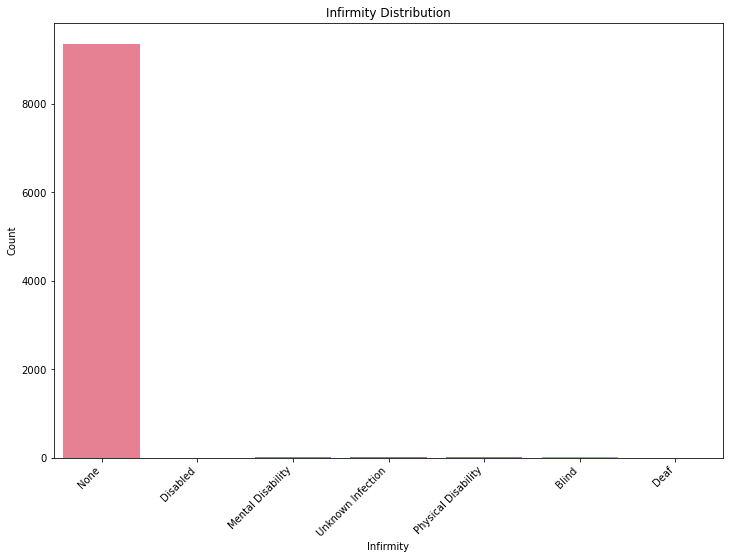

In [165]:
# Set the color palette
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
sns.countplot(x='Infirmity', data=df, palette='husl')
plt.title('Infirmity Distribution')
plt.xlabel('Infirmity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

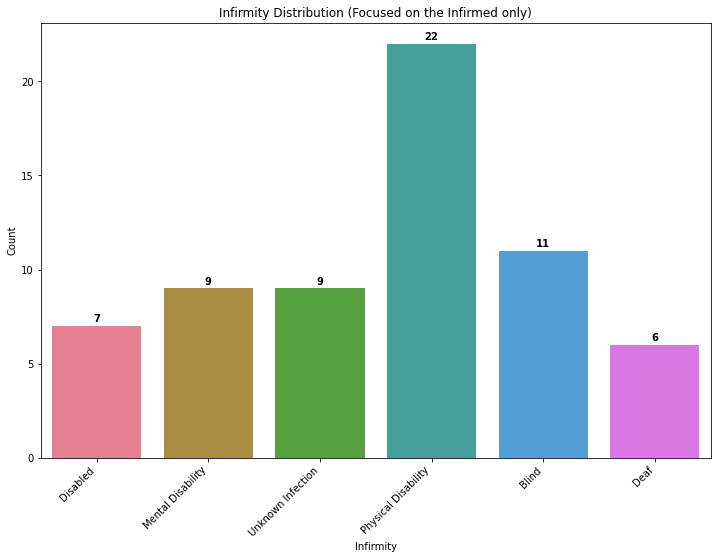

In [350]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Infirmity', data=df[df['Infirmity'] != 'None'], palette='husl')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.title('Infirmity Distribution (Focused on the Infirmed only)')
plt.xlabel('Infirmity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Infirmity by Age

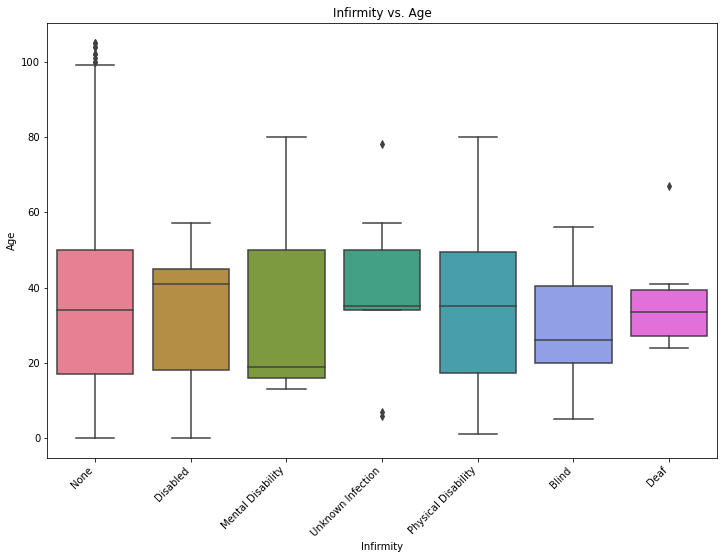

In [351]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Infirmity', y='Age', data=df, palette='husl')
plt.title('Infirmity vs. Age')
plt.xlabel('Infirmity')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Infirmity by Gender

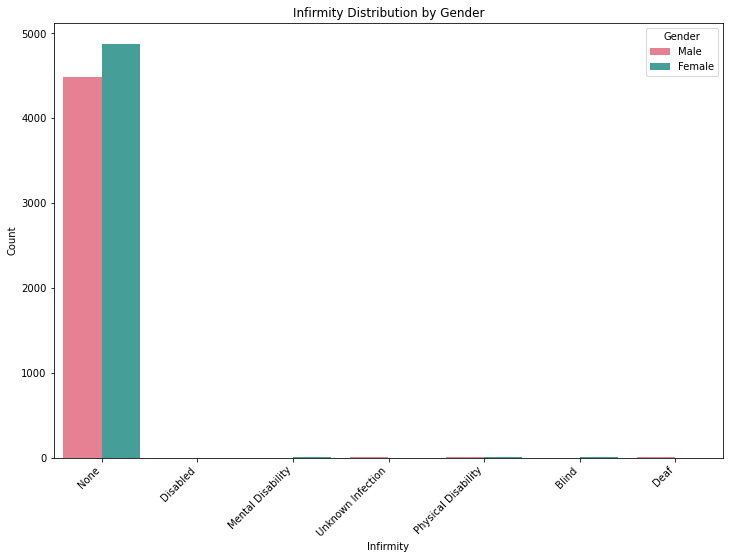

In [359]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Infirmity', hue='Gender', data=df, palette='husl')
plt.title('Infirmity Distribution by Gender')
plt.xlabel('Infirmity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

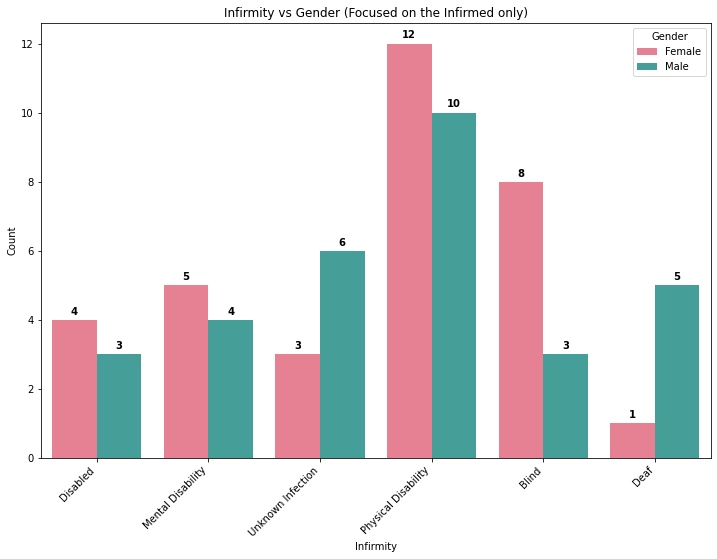

In [353]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Infirmity', hue='Gender', data=df[df['Infirmity'] != 'None'], palette='husl')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.title('Infirmity vs Gender (Focused on the Infirmed only)')
plt.xlabel('Infirmity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Infirmity by Marital Status

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


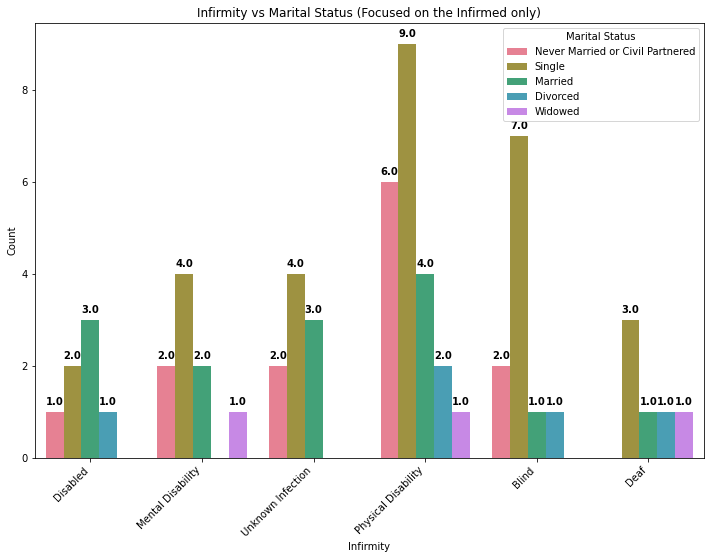

In [356]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Infirmity', hue='Marital Status', data=df[df['Infirmity'] != 'None'], palette='husl')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.title('Infirmity vs Marital Status (Focused on the Infirmed only)')
plt.xlabel('Infirmity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Recommendation & Conclusion

#### 1. What should be built on an unoccupied plot of land that the local government wishes to develop?

##### Recommendation: Train Station
Upon thorough analysis of the census data, I propose the construction of a train station on the unoccupied plot of land. The data reveals that a significant portion, 56.5%, of the working population is engaged in upper-middle-income science, technology, and engineering roles. Given the absence of local universities and the identification of students as commuters, it's evident that many residents depend on transportation links to neighboring cities for work and education.
By establishing a train station with connectivity to these job centers and universities, we can efficiently address the existing commuter demand. Moreover, this initiative would contribute to reducing highway congestion and fostering economic growth. The data suggests an opportunity to attract more residents currently working outside the town, as improved transit options often drive residential relocations.

####  2. Which one of the following options should be invested in?
- (i) Employment and training. 
- (ii) Old age care.
- (iii) Increase spending for schooling.
- (iv) General infrastructure. 

##### (iii) Increase spending for schooling.
As for the investment considerations, I recommend prioritizing expanding schooling infrastructure and educational services to match the emerging needs of the population's youth. With children and students representing close to a fifth of residents, planning for sufficient school capacity is critical. The age distribution pyramid indicates this segment will further grow as more young families put down roots supported by the predominant upper-middle income engineering and technology jobs.

The sheer predominance of large households with 94% having 4 or more members demonstrates both the physical capacity and cultural precedence for higher per family birth rates and multi-child families. With stable occupations, these large families are financially capable of securing enriched education for their children as well. This demand risks being constrained if existing limited school infrastructure remains stagnant while student numbers rise. 

I believe channeling resources into constructing new primary and secondary schools, recruiting more qualified educators, and enriching STEM programs allows the town leadership to align future expenditures with insights revealed by census data on imminent needs. 